In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [30]:
# Parâmetros da placa e condições de contorno (valores ilustrativos)
a_val = 1.0  # Comprimento da placa (m)
b_val = 1.0  # Largura da placa (m)
T1_val = 24.0  # Temperatura T1 (°C)
A_val = 100.0  # Constante A (°C/m)
N_terms = 50  # Número de termos na série

In [31]:
# Criação da malha (grid) para x e y
x_points = np.linspace(0, a_val, 1000)
y_points = np.linspace(0, b_val, 1000)
X_grid, Y_grid = np.meshgrid(x_points, y_points)

In [32]:
from tqdm import tqdm
# Inicializa a matriz de temperatura com T1
T_series_sum = np.zeros(X_grid.shape)

# Cálculo da soma da série
for n in tqdm(range(1, N_terms + 1)):    
    term_Aa_factor = A_val * a_val * ((-1)**(n + 1))
    term_T1_factor = T1_val * (1 - ((-1)**n))
    
    numerator_factor_for_Bn = term_Aa_factor - term_T1_factor
    
    common_arg_factor = n * np.pi / a_val
    sinh_denominator_term = np.sinh(common_arg_factor * b_val)

    if sinh_denominator_term == 0: # Should not happen for n>=1, b_val > 0
        Bn = 0.0
    else:
        Bn = (2 * numerator_factor_for_Bn) / (n * np.pi * sinh_denominator_term)

    # Termo da série para somar
    sin_term = np.sin(common_arg_factor * X_grid)
    sinh_term_grid = np.sinh(common_arg_factor * Y_grid)
    
    T_series_sum += Bn * sin_term * sinh_term_grid

T_grid = T1_val + T_series_sum

100%|██████████| 50/50 [00:00<00:00, 55.17it/s]


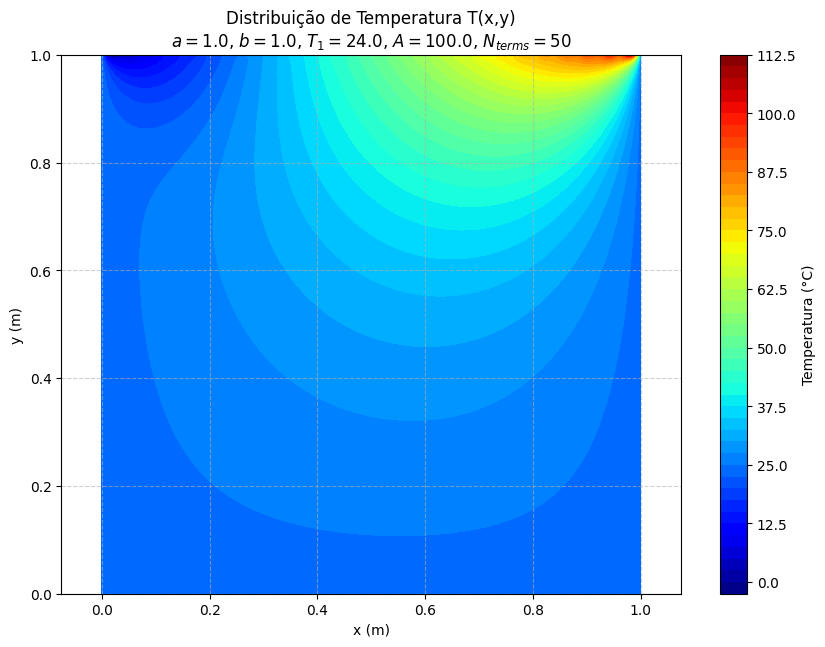

In [33]:
# Plotagem do resultado
plt.figure(figsize=(10, 7)) # Increased figure size for better readability
contour = plt.contourf(X_grid, Y_grid, T_grid, levels=50, cmap=cm.jet)
plt.colorbar(contour, label='Temperatura (°C)')
plt.title(f'Distribuição de Temperatura T(x,y)\n$a={a_val}$, $b={b_val}$, $T_1={T1_val}$, $A={A_val}$, $N_{{terms}}={N_terms}$')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal') # 'image' or 'equal' for aspect ratio. 'image' makes data pixels square.
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("temperature_distribution.png")
plt.show()

In [34]:
# Verificação das condições de contorno (valores aproximados devido à truncagem da série)
print("Valores de T em alguns pontos de contorno (aproximados):")
print(f"T(x, 0) em x=a/2 (y_idx=0, x_idx approx 50): {T_grid[0, 49]:.2f}°C (Esperado: {T1_val:.2f}°C)") # x_points[49] is close to a_val/2
print(f"T(0, y) em y=b/2 (y_idx approx 50, x_idx=0): {T_grid[49, 0]:.2f}°C (Esperado: {T1_val:.2f}°C)") # y_points[49] is close to b_val/2
print(f"T(a, y) em y=b/2 (y_idx approx 50, x_idx=-1): {T_grid[49, -1]:.2f}°C (Esperado: {T1_val:.2f}°C)")


print(f"T(x, b) em x=0.25a (y_idx=-1, x_idx=24): {T_grid[-1, 24]:.2f}°C (Esperado T(0.25a,b)=A*0.25a: {A_val*a_val*0.25:.2f}°C)")
print(f"T(x, b) em x=0.50a (y_idx=-1, x_idx=49): {T_grid[-1, 49]:.2f}°C (Esperado T(0.5a,b)=A*0.5a: {A_val*a_val*0.5:.2f}°C)")
print(f"T(x, b) em x=0.75a (y_idx=-1, x_idx=74): {T_grid[-1, 74]:.2f}°C (Esperado T(0.75a,b)=A*0.75a: {A_val*a_val*0.75:.2f}°C)")
print("\nO plot foi salvo como temperature_distribution.png")

Valores de T em alguns pontos de contorno (aproximados):
T(x, 0) em x=a/2 (y_idx=0, x_idx approx 50): 24.00°C (Esperado: 24.00°C)
T(0, y) em y=b/2 (y_idx approx 50, x_idx=0): 24.00°C (Esperado: 24.00°C)
T(a, y) em y=b/2 (y_idx approx 50, x_idx=-1): 24.00°C (Esperado: 24.00°C)
T(x, b) em x=0.25a (y_idx=-1, x_idx=24): -0.67°C (Esperado T(0.25a,b)=A*0.25a: 25.00°C)
T(x, b) em x=0.50a (y_idx=-1, x_idx=49): 4.80°C (Esperado T(0.5a,b)=A*0.5a: 50.00°C)
T(x, b) em x=0.75a (y_idx=-1, x_idx=74): 8.56°C (Esperado T(0.75a,b)=A*0.75a: 75.00°C)

O plot foi salvo como temperature_distribution.png
